### Importing CSV file

In [42]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
reddit = pd.read_csv('reddit_wsb.csv')
reddit.head()

,title,score,id,url,comms_num,created,body,timestamp
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56


## Aggregate the timestamp

In [44]:
reddit['date'] = pd.to_datetime(reddit.timestamp).dt.date
reddit['hour'] = pd.to_datetime(reddit.timestamp).dt.hour
reddit['dayOfWeek'] = pd.to_datetime(reddit['timestamp']).dt.day_name()

In [45]:
reddit.head()

,title,score,id,url,comms_num,created,body,timestamp,date,hour,dayOfWeek
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41,2021-01-28,21,Thursday
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10,2021-01-28,21,Thursday
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35,2021-01-28,21,Thursday
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57,2021-01-28,21,Thursday
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56,2021-01-28,21,Thursday


## Get total post per day

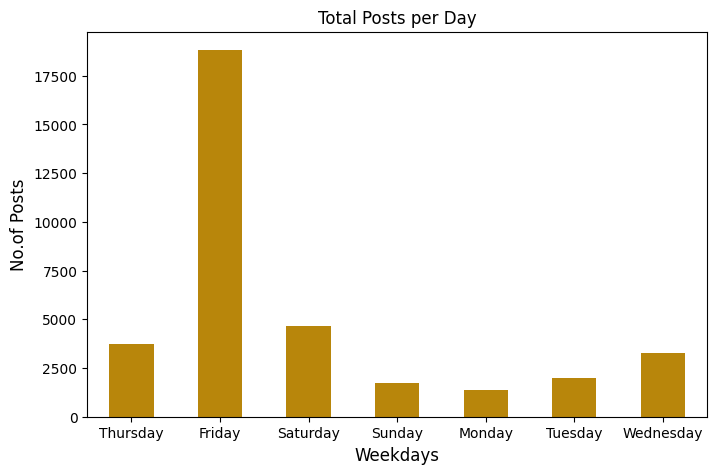

In [46]:
reddit_day = reddit['dayOfWeek']

plt.figure(figsize=(8,5))
reddit_day = reddit_day.groupby(reddit_day,sort=False).count().plot.bar(color='darkgoldenrod')
plt.xlabel("Weekdays", fontsize=12)
plt.ylabel("No.of Posts", fontsize=12)
plt.xticks(rotation='horizontal')
plt.title('Total Posts per Day', fontsize=12)
plt.show()

## Cleaning data

In [47]:
title_reddit = reddit[['title']].dropna()
body_reddit = reddit[['body']].dropna()

In [48]:
title_reddit

,title
0,"It's not about the money, it's about sending a..."
1,Math Professor Scott Steiner says the numbers ...
2,Exit the system
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...
4,"Not to distract from GME, just thought our AMC..."
...,...
35595,Movies are Back in NY
35596,"Instructions unclear, bought more GME"
35597,Tomorrow Square will beat its consensus gross ...
35598,AMC GAIN LETS DO GAMESTOP NUMBERS BOOOOYS 🚀🚀🚀


In [49]:
body_reddit

,body
2,The CEO of NASDAQ pushed to halt trading “to g...
6,Hedgefund whales are spreading disinfo saying ...
7,Life isn't fair. My mother always told me that...
10,I believe right now is one of those rare oppo...
12,You guys are champs. GME... who would have tho...
...,...
35582,"Disclaimer: I'm an idiot, who despite starting..."
35589,Whats good retards. I know there's been a few ...
35594,How are none of you autists talking about the...
35597,Square's business segment has seen a dramatic ...


In [50]:
def cleantext(text):
    # make lower case
    text = str(text).lower()
    # remove square in brackets
    text = re.sub('\[.*?\]', ' ', text)
    # remove URLs
    text = re.sub(r"http\S+", ' ', text)
    # remove punctuation
    text = re.sub('<.*?>+', ' ', text)
    # remove handlers
    text = re.sub('@[^\s]+', ' ', text)
    # remove all special characters
    text = ' '.join(re.findall(r'\w+', text))
    # remove all single characters
    text = re.sub(r'\s+[a-zA-Z]\s', ' ', text)
    # replace multiple spaces with single space
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    return text

In [51]:
title_reddit['title'] = title_reddit['title'].apply(cleantext)
body_reddit['body'] = body_reddit['body'].apply(cleantext)

## Stemming

In [52]:
import nltk

In [53]:
stemmer = nltk.SnowballStemmer('english')

def stemming(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

In [54]:
title_reddit['title'] = title_reddit['title'].apply(stemming)
body_reddit['body'] = body_reddit['body'].apply(stemming)

In [55]:
body_reddit.head()

,body
2,the ceo of nasdaq push to halt trade to give i...
6,hedgefund whale are spread disinfo say friday ...
7,life isn fair my mother alway told me that whe...
10,i believ right now is one of those rare opport...
12,you guy are champ gme who would have thought b...


In [87]:
title_reddit.head()

,title,title_values,title_sentiments
0,it not about the money it about send messag,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
1,math professor scott steiner say the number sp...,"{'neg': 0.0, 'neu': 0.894, 'pos': 0.106, 'comp...",Positive
2,exit the system,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
3,new sec file for gme can someon less retard th...,"{'neg': 0.206, 'neu': 0.794, 'pos': 0.0, 'comp...",Negative
4,not to distract from gme just thought our amc ...,"{'neg': 0.0, 'neu': 0.881, 'pos': 0.119, 'comp...",Positive


## Get sentiment values for title and body post using Binary Classifier 

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

df = pd.read_csv("stock_data.csv")
#Only taking the text and Sentiment attributes, for relevance purposes
tweet_df = df[['Text','Sentiment']]
print(tweet_df.shape)
tweet_df.head(5)
#Removing Neutral sentiments, as we need a binary classifier
tweet_df = tweet_df[tweet_df['Sentiment'] != 'neutral']
print(tweet_df.shape)
tweet_df.head(10)
#getting the value of counts of each sentiment
tweet_df["Sentiment"].value_counts()
sentiment_label = tweet_df.Sentiment.factorize()
sentiment_label

(5791, 2)
(5791, 2)


(array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 Int64Index([1, -1], dtype='int64'))

#### Tokenisation of values

In [58]:
tweet = tweet_df.Text.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)
print(tokenizer.word_index)

{'the': 1, 'to': 2, 'a': 3, 'on': 4, 'in': 5, 'of': 6, 'for': 7, 'aap': 8, 'and': 9, 'is': 10, 't': 11, 'co': 12, 'https': 13, 'user': 14, 'at': 15, 'it': 16, 'this': 17, 'i': 18, 'short': 19, 'up': 20, 'will': 21, 'from': 22, 'over': 23, 'with': 24, 'here': 25, 'be': 26, '1': 27, 'today': 28, 'out': 29, 'as': 30, 'volume': 31, '2': 32, 'that': 33, 'day': 34, 'like': 35, 'are': 36, 'but': 37, 'long': 38, 'if': 39, '50': 40, 'now': 41, '3': 42, 'not': 43, 'good': 44, 'stock': 45, 'has': 46, 'you': 47, 'my': 48, 'more': 49, 'goog': 50, 'some': 51, 'above': 52, 'watch': 53, 'new': 54, 'bac': 55, 'down': 56, 'stop': 57, 'still': 58, 'have': 59, 'nice': 60, '5': 61, 'back': 62, 'buy': 63, 'after': 64, 'next': 65, 'move': 66, 'higher': 67, 'coronavirus': 68, 'market': 69, '4': 70, 'we': 71, 'by': 72, '10': 73, 'time': 74, 'off': 75, 'all': 76, 'so': 77, 'no': 78, 'see': 79, 'just': 80, 'ong': 81, 'an': 82, 'one': 83, 'week': 84, '8': 85, 'sensex': 86, 'or': 87, 'triangle': 88, 'trade': 89, '

In [59]:
print(tweet[0])
print(encoded_docs[0])

Kickers on my watchlist XIDE TIT SOQ PNK CPW BPZ AJ  trade method 1 or method 2, see prev posts
[4613, 4, 48, 443, 3254, 4614, 4615, 4616, 3255, 4617, 1453, 89, 3256, 27, 87, 3256, 32, 79, 2147, 2562]


In [60]:
print(padded_sequence[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0 4613    4
   48  443 3254 4614 4615 4616 3255 4617 1453   89 3256   27   87 3256
   32 

### Creating the sequential model

In [61]:
embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 32)           326016    
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 200, 32)          0         
 lDropout1D)                                                     
                                                                 
 lstm_2 (LSTM)               (None, 50)                16600     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 342,667
Trainable params: 342,667
Non-trainable params: 0
________________________________________________

In [62]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
145/145 [==============================] - 19s 115ms/step - loss: 0.6224 - accuracy: 0.6747 - val_loss: 0.7807 - val_accuracy: 0.4763
Epoch 2/5
145/145 [==============================] - 16s 113ms/step - loss: 0.4585 - accuracy: 0.7809 - val_loss: 0.8275 - val_accuracy: 0.5505
Epoch 3/5
145/145 [==============================] - 16s 112ms/step - loss: 0.3317 - accuracy: 0.8623 - val_loss: 0.7561 - val_accuracy: 0.6048
Epoch 4/5
145/145 [==============================] - 16s 114ms/step - loss: 0.2744 - accuracy: 0.8903 - val_loss: 0.8283 - val_accuracy: 0.6091
Epoch 5/5
145/145 [==============================] - 16s 112ms/step - loss: 0.2439 - accuracy: 0.9054 - val_loss: 0.9279 - val_accuracy: 0.5738


#### Plotting the accuracy on a graph

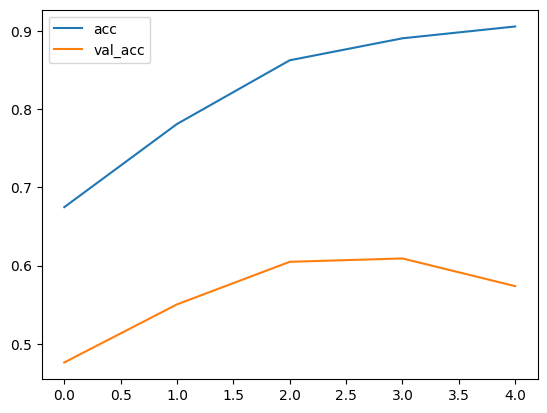

<Figure size 640x480 with 0 Axes>

In [63]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

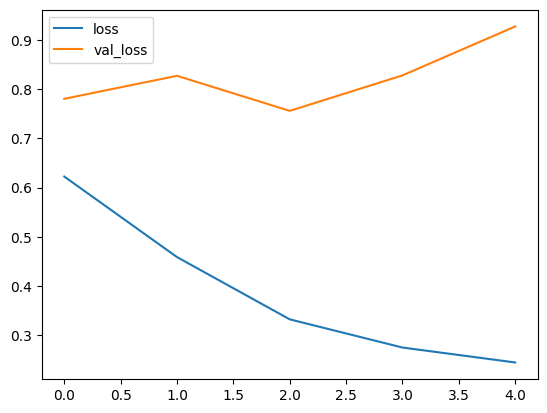

<Figure size 640x480 with 0 Axes>

In [64]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plot.jpg")

### Providing sentiment intensity

In [65]:
title_reddit.head()

,title
0,it not about the money it about send messag
1,math professor scott steiner say the number sp...
2,exit the system
3,new sec file for gme can someon less retard th...
4,not to distract from gme just thought our amc ...


In [95]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    return sentiment_label[1][prediction]

In [97]:
for i in range(35600):    
    title_reddit['title_values']=predict_sentiment(title_reddit['title'][i])
    title_reddit.head()

1/1 [==============================] - 0s 45ms/step


In [68]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [69]:
title_reddit['title_values'] = title_reddit['title'].apply(lambda x: sia.polarity_scores(' '.join(re.findall(r'\w+',x.lower()))))
body_reddit['body_values'] = body_reddit['body'].apply(lambda x: sia.polarity_scores(' '.join(re.findall(r'\w+',x.lower()))))

In [70]:
title_reddit.head()

,title,title_values
0,it not about the money it about send messag,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,math professor scott steiner say the number sp...,"{'neg': 0.0, 'neu': 0.894, 'pos': 0.106, 'comp..."
2,exit the system,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,new sec file for gme can someon less retard th...,"{'neg': 0.206, 'neu': 0.794, 'pos': 0.0, 'comp..."
4,not to distract from gme just thought our amc ...,"{'neg': 0.0, 'neu': 0.881, 'pos': 0.119, 'comp..."


In [71]:
def sent_value(text):
    if text['compound']>0:
        return 'Positive'
    elif text['compound']<0:
        return 'Negative'
    else:
        return 'Neutral'

title_reddit['title_sentiments'] = title_reddit['title_values'].apply(lambda x: sent_value(x))
body_reddit['body_sentiments'] = body_reddit['body_values'].apply(lambda x: sent_value(x))

In [72]:
title_reddit.head()

,title,title_values,title_sentiments
0,it not about the money it about send messag,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
1,math professor scott steiner say the number sp...,"{'neg': 0.0, 'neu': 0.894, 'pos': 0.106, 'comp...",Positive
2,exit the system,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
3,new sec file for gme can someon less retard th...,"{'neg': 0.206, 'neu': 0.794, 'pos': 0.0, 'comp...",Negative
4,not to distract from gme just thought our amc ...,"{'neg': 0.0, 'neu': 0.881, 'pos': 0.119, 'comp...",Positive


In [73]:
body_reddit.head()

,body,body_values,body_sentiments
2,the ceo of nasdaq push to halt trade to give i...,"{'neg': 0.052, 'neu': 0.87, 'pos': 0.078, 'com...",Positive
6,hedgefund whale are spread disinfo say friday ...,"{'neg': 0.09, 'neu': 0.885, 'pos': 0.025, 'com...",Negative
7,life isn fair my mother alway told me that whe...,"{'neg': 0.144, 'neu': 0.785, 'pos': 0.071, 'co...",Negative
10,i believ right now is one of those rare opport...,"{'neg': 0.083, 'neu': 0.792, 'pos': 0.125, 'co...",Positive
12,you guy are champ gme who would have thought b...,"{'neg': 0.077, 'neu': 0.804, 'pos': 0.118, 'co...",Positive


## Plot setiments for title and body posts

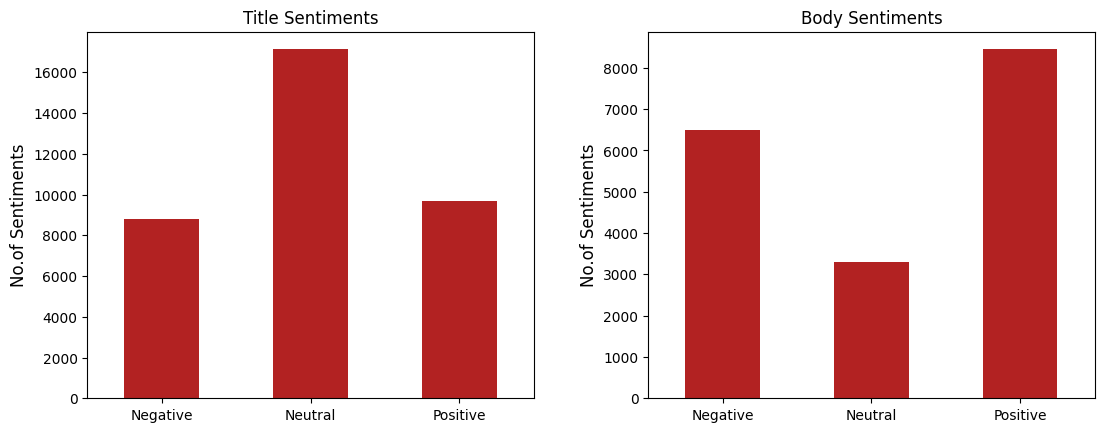

In [74]:
fig, axr = plt.subplots(1,2, figsize=(12, 6))

title_reddit['title_sentiments'].value_counts().sort_index().plot.bar(ax=axr[0], color='firebrick')
ax=axr[0].set_title("Title Sentiments", fontsize=12)

body_reddit['body_sentiments'].value_counts().sort_index().plot.bar(ax=axr[1], color='firebrick')
ax=axr[1].set_title("Body Sentiments", fontsize=12)

fig.tight_layout(pad=5.0)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation='horizontal')
    plt.ylabel("No.of Sentiments", fontsize=12)

## Token Visualization

In [75]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [2]:
stocks = {
    "GME": 142.67,
    "Robinhood": 249.73,
    "Tesla": 563.46,
    "Nasdaq Futures": 13406.50,
    "Tencent Holdings Ltd.": 339.400,
    "NIO Inc.": 63.300
}

In [77]:
# FOR TITLE POSTS
title_text = " ".join(review for review in title_reddit['title'])
print ("There are {} words in the combination of all posts.".format(len(title_text)))

There are 1818331 words in the combination of all posts.


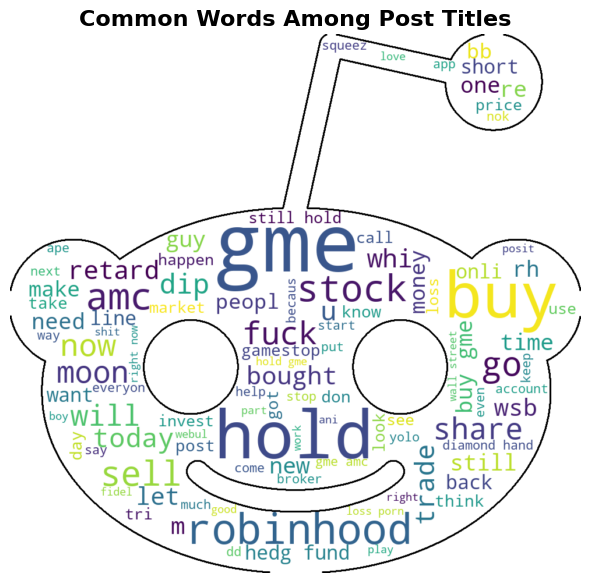

In [78]:
reddit_mask = np.array(Image.open("reddit.png"))
stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", max_words=100, mask=reddit_mask,
               stopwords=stopwords, contour_width=3)

wc.generate(title_text)
plt.figure(figsize=[15,7])
plt.imshow(wc, interpolation='bilinear')
plt.title('Common Words Among Post Titles',fontsize=16,fontweight='bold')
plt.axis("off")
plt.show()

In [79]:
# FOR BODY POSTS
body_text = " ".join(review for review in body_reddit['body'])
print ("There are {} words in the combination of all post bodies.".format(len(body_text)))

There are 12134472 words in the combination of all post bodies.


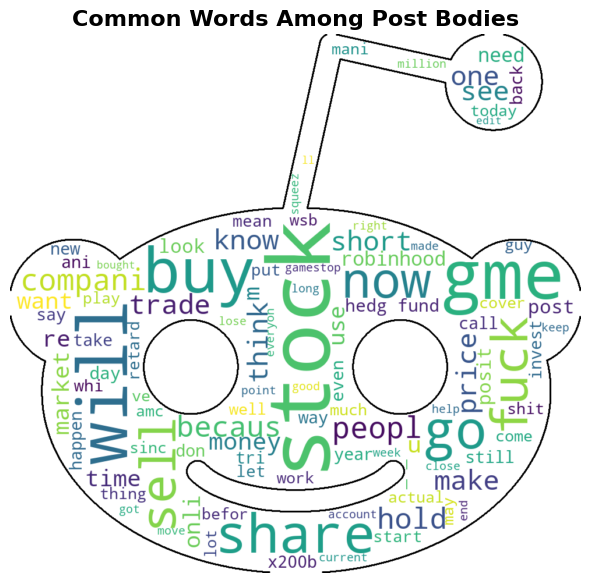

In [80]:

wc = WordCloud(background_color="white", max_words=100, mask=reddit_mask,
               stopwords=stopwords, contour_width=3)

wc.generate(body_text)
plt.figure(figsize=[15,7])
plt.imshow(wc, interpolation='bilinear')
plt.title('Common Words Among Post Bodies',fontsize=16,fontweight='bold')
plt.axis("off")
plt.show()

### Common words for each sentiments in post titles

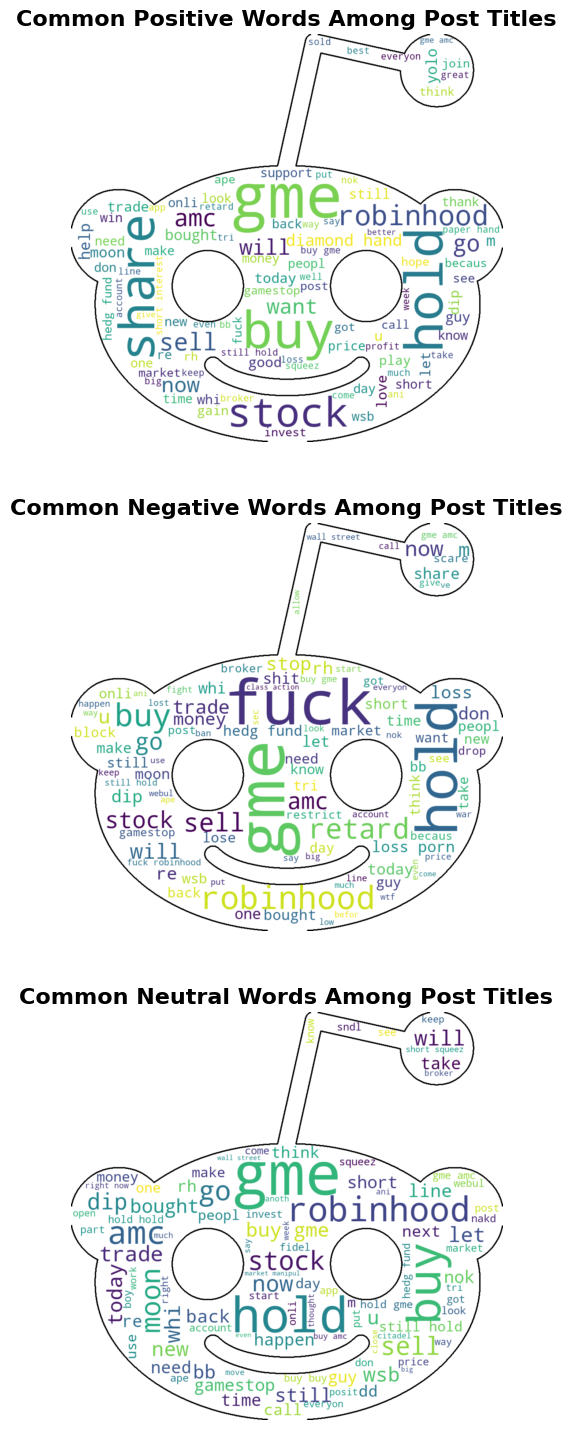

In [81]:
sentiments = ['Positive', 'Negative', 'Neutral']
fig, (axr1, axr2, axr3) = plt.subplots(3, 1, figsize=[20,18])
axes = [axr1, axr2, axr3]

for i in range(3):
    stopwords = set(STOPWORDS)
    titleSent = title_reddit[title_reddit['title_sentiments']==sentiments[i]]['title']
    titleText = ' '.join(titleSent)
    
    wc = WordCloud(background_color="white", max_words=100, mask=reddit_mask,
               stopwords=stopwords, contour_width=3).generate(titleText)
    
    axes[i].imshow(wc, interpolation='bilinear')
    axes[i].set_title(f'Common {sentiments[i]} Words Among Post Titles',fontsize=16,fontweight='bold')
    axes[i].axis("off")
        
plt.show()
    

### Common words for each sentiments in post bodies

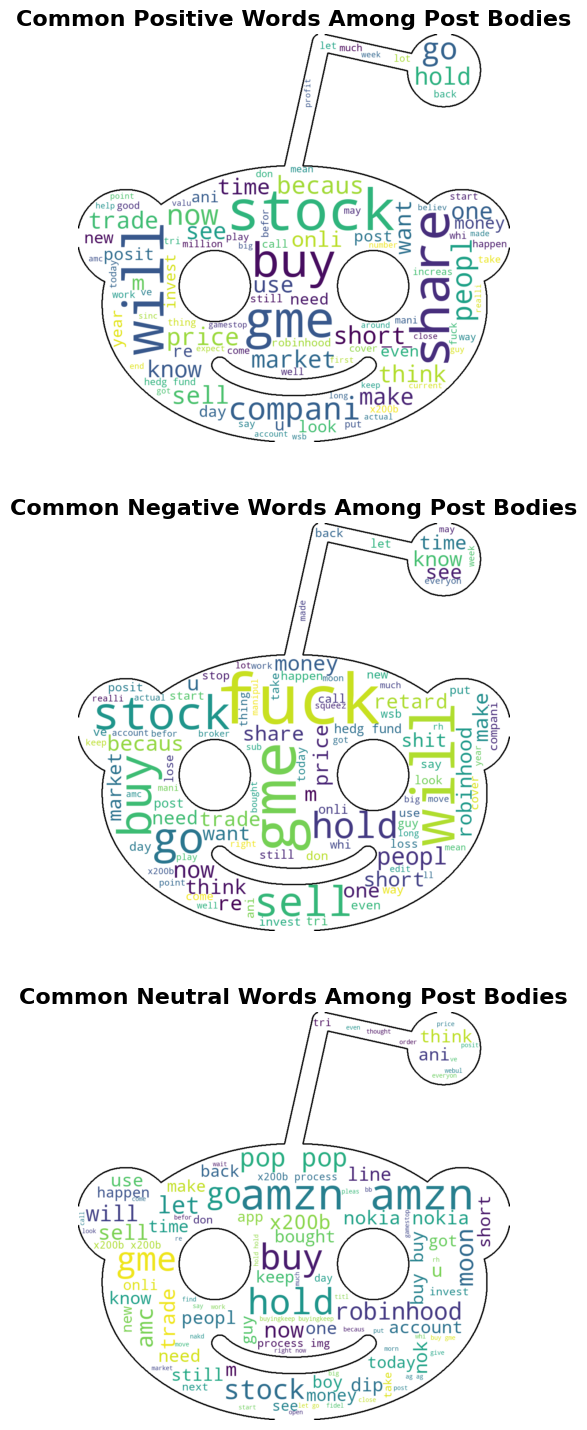

In [82]:
sentiments = ['Positive', 'Negative', 'Neutral']
fig, (axr1, axr2, axr3) = plt.subplots(3, 1, figsize=[20,18])
axes = [axr1, axr2, axr3]

for i in range(3):
    stopwords = set(STOPWORDS)
    bodySent = body_reddit[body_reddit['body_sentiments']==sentiments[i]]['body']
    bodyText = ' '.join(bodySent)
    
    wc = WordCloud(background_color="white", max_words=100, mask=reddit_mask,
               stopwords=stopwords, contour_width=3).generate(bodyText)
    
    axes[i].imshow(wc, interpolation='bilinear')
    axes[i].set_title(f'Common {sentiments[i]} Words Among Post Bodies',fontsize=16,fontweight='bold')
    axes[i].axis("off")
        
plt.show()

### Grouping together the data with positive sentiment intensity

In [83]:
bodySent = body_reddit[body_reddit['body_sentiments']==sentiments[1]]['body']
bodySent

6        hedgefund whale are spread disinfo say friday ...
7        life isn fair my mother alway told me that whe...
39       how fuck stupid is it that retail get no chanc...
46       let imagin gme has gone to 50 000 the market h...
48       to all who is support gme movi land the brick ...
                               ...                        
35439    open your account today you see that that red ...
35483    for the newfriend this is our far too frequent...
35502    i ve been puke and shit myself for the past th...
35514    i see popular post say that we re go buy or ho...
35589    what good retard know there been few post on h...
Name: body, Length: 6485, dtype: object

### Idenifying stocks from the data

In [84]:
import requests

def identify_stock_names(bodySent):
    stock_names = []
    word_set = set(bodyText)
    response = requests.get("https://www.alphavantage.co/query?function=LISTING_STATUS&apikey=demo")
    if response.status_code == 200:
        stock_set = set([name for name in response.json()["symbolsList"]])
        for word in word_set:
            if word in stock_set:
                stock_names.append(word)
    return stock_names

In [85]:
import requests

def identify_stock_names(titleText):
    stock_names = []
    word_set = set(titleText)
    response = requests.get("https://www.alphavantage.co/query?function=LISTING_STATUS&apikey=demo")
    if response.status_code == 200:
        stock_set = set([name for name in response.json()["symbolsList"]])
        for word in word_set:
            if word in stock_set:
                stock_names.append(word)
    return stock_names

#### UI for the display

In [11]:
import tkinter as tk

root = tk.Tk()
root.title("Stock Prices")
root.geometry("700x500")
root.configure(bg="#BFEFFF")
frame = tk.Frame(root, bg="#FFFFFF", bd=1, relief=tk.SOLID)
frame.pack(fill=tk.BOTH, expand=True, padx=40, pady=40)
label = tk.Label(frame, text="\n".join([f"{stock}: ${price:.2f}" for stock, price in stocks.items()]), 
                 font=("Arial", 20), bg="#FFFFFF")
label.pack(padx=40, pady=40)

title_label = tk.Label(frame, text="Stock Prices", font=("Arial", 28, "bold"), bg="#0d0d0d", fg="#e6dcdc")
title_label.pack(side=tk.TOP, padx=40, pady=20)
frame.configure(highlightbackground="#CCCCCC")
root.mainloop()
